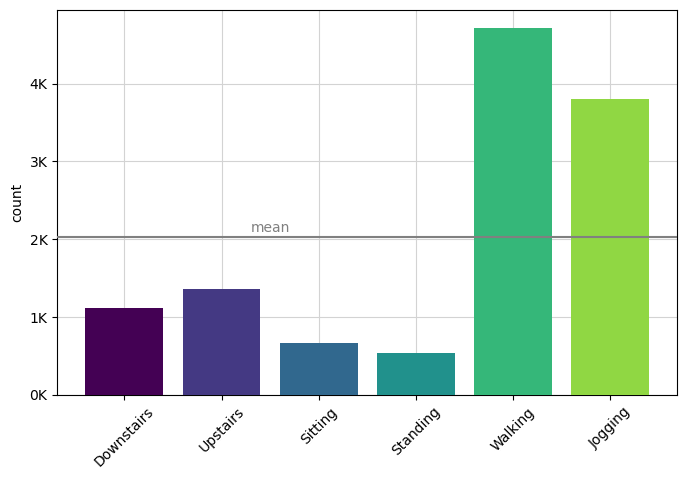

In [1]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
df = pd.read_csv("actitracker_raw.txt", delimiter=",", names=["user_id","class","timestamp","x","y","z"], usecols=["user_id","class","timestamp"])
sort = {'Downstairs': 0, 'Upstairs': 1, 'Sitting': 2, 'Standing': 3, 'Walking': 4, 'Jogging': 5} 
df = df.sort_values(by=['class'], key=lambda x: x.map(sort))['class'].value_counts(sort=False).reset_index()
df.columns=["class","count"]
fig, ax = plt.subplots(figsize=(8, 5))
df["count"] = df["count"].map(lambda x: int(x/90))
# Loop through the DataFrame and plot each bar with a color from the Viridis colormap
for i, row in df.iterrows():
    ax.bar(row['class'], row['count'], color=viridis(i / len(df)), zorder=10)
# df.plot.bar(x='class', y='count', ax=ax, color=viridis_colors, legend=None, zorder=10)    
plt.axhline(df["count"].mean(), color="gray", zorder=20)
# plt.annotate("mean", [1.3,190000], color="gray")
plt.annotate("mean", [1.3,2100], color="gray")
plt.grid(True, which="both", color="lightgray", zorder=0)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y/1000) + 'K'))
plt.ylabel("count")
plt.xticks(rotation=45)
plt.savefig("data_distribution.png", bbox_inches='tight')

In [2]:
# import pandas as pd
# import matplotlib.ticker as ticker
# import matplotlib.pyplot as plt
# from matplotlib.cm import viridis
# df = pd.read_csv("actitracker_raw.txt", delimiter=",", names=["user_id","class","timestamp","x","y","z"])
# def plot_sample(sample):
#     sample = np.transpose(sample.detach().numpy())
#     plt.imshow(sample, aspect='auto')
#     plt.show()

# fig, ax = plt.subplots(figsize=(8, 5))
# df.plot.bar(x='class', y='count', ax=ax, color=viridis_colors, legend=None, zorder=10)    
# plt.axhline(df["count"].mean(), color="gray", zorder=20)
# plt.annotate("mean", [1.3,190000], color="gray")
# plt.grid(True, which="both", color="lightgray", zorder=0)
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y/1000) + 'K'))
# plt.ylabel("count")
# plt.xticks(rotation=45)
# plt.savefig("data_distribution.png", bbox_inches='tight')

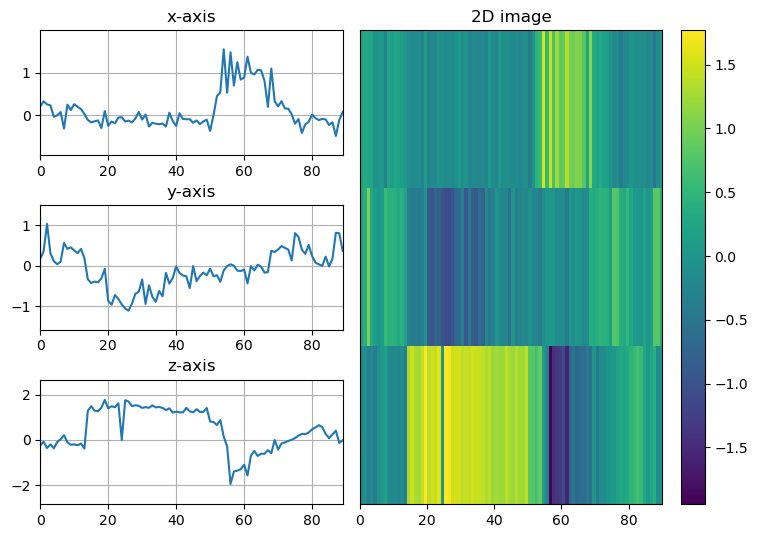

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data and labels
data = np.load('trainData.npy')
labels = np.load('trainLabels.npy')
# Find the index of the first occurrence of class 0
index = np.where(np.argmax(labels, axis=1) == 0)[0][0]
# Extract the corresponding sample
sample = data[index][:,:,0]
# Create a DataFrame from the sample
df = pd.DataFrame(sample, columns=['x-axis', 'y-axis', 'z-axis'])

# Define the plotAxis function
def plotAxis(axis, x, y, title):
    axis.plot(x, y)
    axis.set_title(title)
    axis.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    axis.set_xlim([min(x), max(x)])
    axis.grid(True)

# Define the plotActivity function
def plotActivity(d):
    fig = plt.figure(figsize=(9, 6))
    gs = fig.add_gridspec(3, 2, width_ratios=[4,5])  # 3 rows, 2 columns
    ax00 = fig.add_subplot(gs[0, 0])
    plotAxis(ax00, d.index, d['x-axis'], 'x-axis')
    ax10 = fig.add_subplot(gs[1, 0])
    plotAxis(ax10, d.index, d['y-axis'], 'y-axis')
    ax20 = fig.add_subplot(gs[2, 0])
    plotAxis(ax20, d.index, d['z-axis'], 'z-axis')
    ax2 = fig.add_subplot(gs[:, 1])
    # ax2.imshow(np.transpose(data), aspect='auto', extent=[0, len(data), 0, 1], legend=True)
    im = ax2.imshow(np.transpose(d), aspect='auto', extent=[0, len(d), 0, 1])
    ax2.set_title('2D image')
    ax2.set_aspect('auto')
    ax2.yaxis.set_visible(False)
    plt.colorbar(im, ax=ax2)
    ax2.set_title('2D image')
    ax2.set_aspect('auto')
    ax2.yaxis.set_visible(False)
    plt.subplots_adjust(hspace=0.4, wspace=0.05)
    plt.subplots_adjust(top=0.9)
    plt.savefig("data_representations.png", bbox_inches='tight', dpi=100)
    
# Call the plotActivity function
plotActivity(df)

In [4]:
def plot_sample(s):
    s = np.transpose(s)
    plt.imshow(s, aspect='auto')
    plt.show()

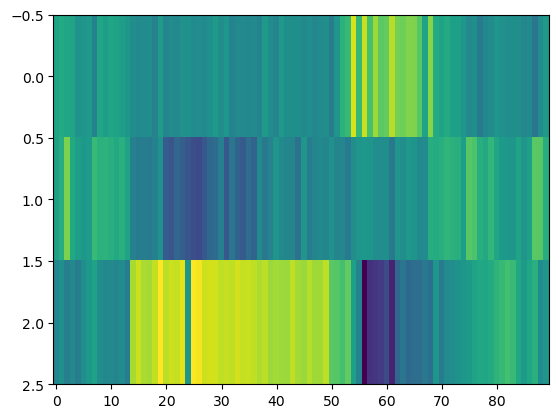

In [5]:
plot_sample(sample)

In [6]:
def place_patch(d, patch_train):
    #data shape:           torch.Size([10, 1, 90, 3])
    #patch shape example:  torch.Size([20, 3])

    if patch_train.shape[1] > 3 or patch_train.shape[0] > d.shape[2]:
        print('Patch shape exceeds data shape and is invalid!')
        return

    for i in range(d.shape[0]): #for each sample
        if d.shape[2] != patch_train.shape[0]:
            w = np.random.randint(0, d.shape[2] - patch_train.shape[0]) #randomly select a starting point for the patch
        else:
            w = 0

        if d.shape[3] != patch_train.shape[1]:
            h = np.random.randint(0, d.shape[3] - patch_train.shape[1]) #randomly select a starting point for the patch
        else:
            h = 0

        d[i, :, w:w + patch_train.shape[0], h:h + patch_train.shape[1]] = patch_forward(patch_train)#.reshape(patch_train.shape[0], patch_train.shape[1], 1)
    return d

(1, 1, 90, 3)


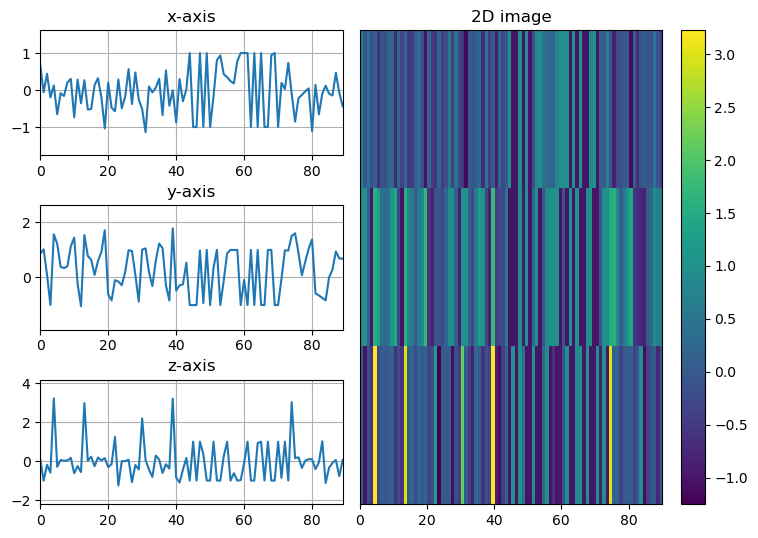

In [7]:
def patch_forward(patch):
    #patch = (torch.tanh(patch) + 1 - 2 * TENSOR_MEANS) / (2 * TENSOR_STD)
    #TODO: is this right way to do this? If not normalised do the line above?
    patch = torch.tanh(patch)
    return patch

#load patches_4/class_5_patch_4_size_30_3_ep_3.pt into numpy
import torch
tensor = torch.load('patches_4/class_5_patch_4_size_30_3_ep_3.pt')

# Find the index of the first occurrence of class 5
index = np.where(np.argmax(labels, axis=1) == 5)[0][0]
sample = data[index][:,:,0]
# Add two new dimensions to the sample
sample = np.expand_dims(sample, axis=0)
sample = np.expand_dims(sample, axis=0)
print(sample.shape)  # Now it should print (1, 1, 90, 3)
#convert patch to tensor

sample = place_patch(sample, tensor)
#convert back to (90,3)
sample = sample[0,0,:,:]

# Create a DataFrame from the sample
df = pd.DataFrame(sample, columns=['x-axis', 'y-axis', 'z-axis'])
plotActivity(df)


(1, 1, 90, 3)
torch.Size([10, 3])


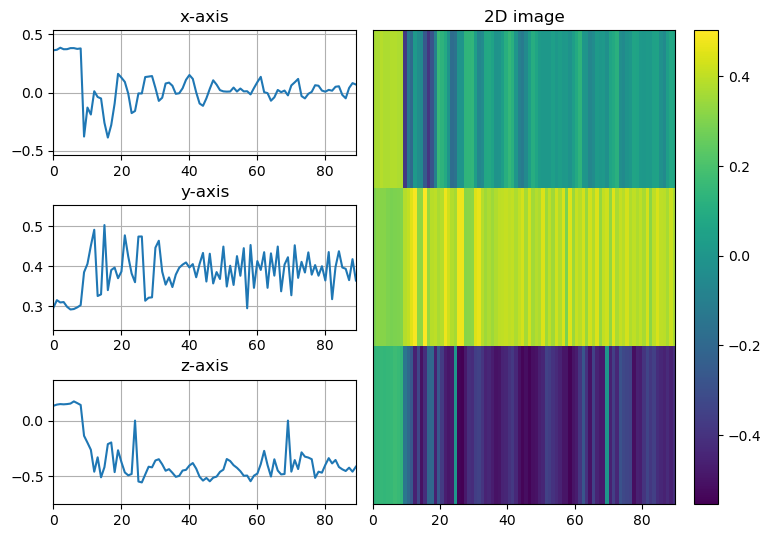

(1, 1, 90, 3)
torch.Size([10, 3])


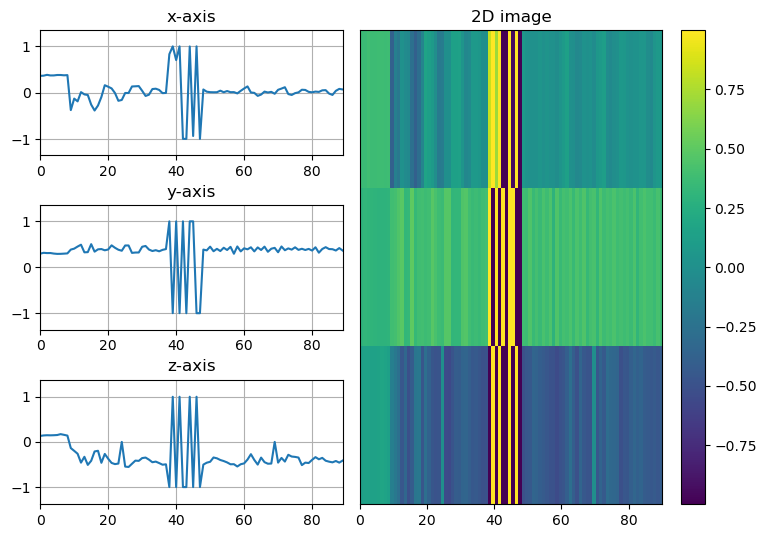

(1, 1, 90, 3)
torch.Size([30, 3])


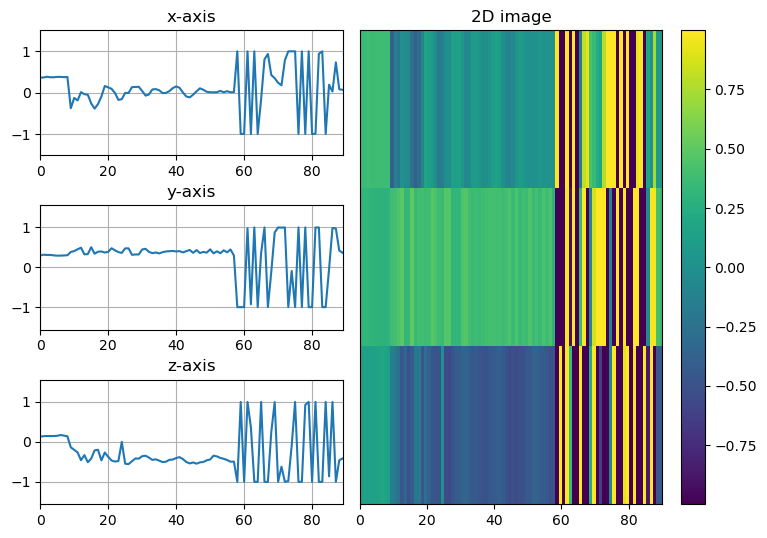

(1, 1, 90, 3)
torch.Size([90, 3])


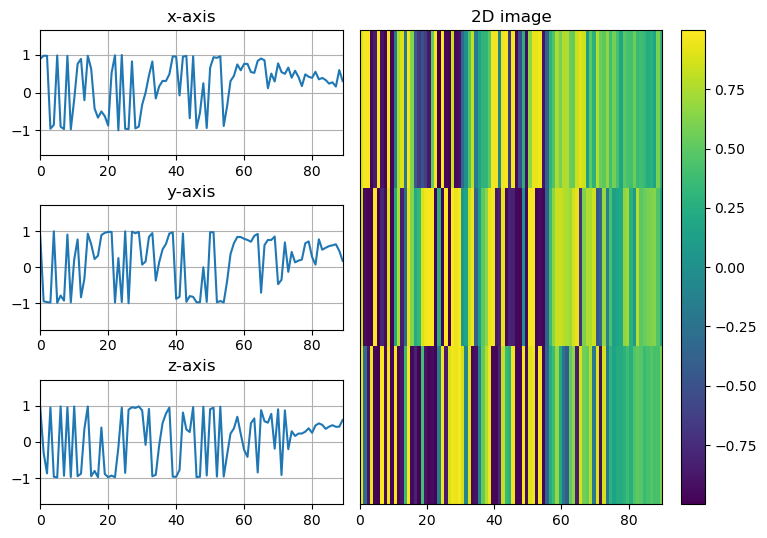

In [11]:
def process_patch(file_name, title):
    # Load the patch
    tensor_ = torch.load(file_name)
    # Find the index of the first occurrence of class 5
    index_ = np.where(np.argmax(labels, axis=1) == 3)[0][0]
    sample_ = data[index_][:,:,0]
    # Add two new dimensions to the sample
    sample_ = np.expand_dims(sample_, axis=0)
    sample_ = np.expand_dims(sample_, axis=0)
    print(sample_.shape)  # Now it should print (1, 1, 90, 3)
    print(tensor_.shape)
    # Create a copy of the sample
    sample_copy = np.copy(sample_)
    # Place the patch
    sample_copy = place_patch(sample_copy, tensor_)
    # Convert back to (90,3)
    sample_copy = sample_copy[0,0,:,:]
    # Create a DataFrame from the sample
    df_ = pd.DataFrame(sample_copy, columns=['x-axis', 'y-axis', 'z-axis'])
    # Plot the activity
    plotActivity(df_)
    #save the figure
    plt.savefig(f"images/place_patch_{title} .png", bbox_inches='tight', dpi=100)
    plt.show()

def process_without_patch(file_name, title="Original sample"):
    # Load the patch
    tensor_ = torch.load(file_name)
    # Find the index of the first occurrence of class 5
    index_ = np.where(np.argmax(labels, axis=1) == 3)[0][0]
    sample_ = data[index_][:,:,0]
    # Add two new dimensions to the sample
    sample_ = np.expand_dims(sample_, axis=0)
    sample_ = np.expand_dims(sample_, axis=0)
    print(sample_.shape)  # Now it should print (1, 1, 90, 3)
    print(tensor_.shape)
    # Skip the patch placement
    # Convert back to (90,3)
    sample_ = sample_[0,0,:,:]
    # Create a DataFrame from the sample
    df_ = pd.DataFrame(sample_, columns=['x-axis', 'y-axis', 'z-axis'])
    # Plot the activity
    plotActivity(df_)
    plt.savefig(f"images/place_patch_{title} .png", bbox_inches='tight', dpi=100)
    plt.show()

# Call the function for each file

process_without_patch('patches_4/class_5_patch_4_size_10_3_ep_3.pt')
process_patch('patches_4/class_5_patch_4_size_10_3_ep_3.pt', '10x3')
process_patch('patches_4/class_5_patch_4_size_30_3_ep_3.pt', '30x3')
process_patch('patches_4/class_5_patch_4_size_90_3_ep_3.pt', '90x3')
